In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load in Data & Libraries

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder


In [8]:
status_analysis = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Status_Analysis.csv')
Online_Services = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Online_Services.csv')
Customer_Info = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Customer_Info.csv')
Service_Options = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Service_Options.csv')
Location_Data = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Location_Data.csv')
Payment_Info =  pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Payment_Info.csv')

df = pd.merge(status_analysis,Online_Services, how="inner", on="customer_id").merge(Customer_Info,how="inner", on="customer_id").merge(Service_Options,how="inner", on="customer_id").merge(Location_Data, how="inner", on="customer_id").merge(Payment_Info,how="inner", on="customer_id")

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,customer_id,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,phone_service_x,internet_service_x,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service_y,phone_service_y,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,country,state,city,zip_code,total_population,latitude,longitude,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,0002-ORFBO,3,2205,Stayed,65,No,0,Not Applicable,NaN,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable,Female,37,No,No,Yes,No,0,Yes,9,Yes,Yes,No,16,Yes,NaN,Yes,2,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81
1,0003-MKNFE,5,5414,Stayed,66,No,0,Not Applicable,NaN,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable,Male,46,No,No,No,No,0,No,9,Yes,Yes,Yes,10,No,NaN,No,0,United States,California,Glendale,91206,31297,34.162515,-118.203869,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28
2,0004-TLHLJ,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic,Male,50,No,No,No,No,0,No,4,Yes,Yes,No,30,Yes,Offer E,No,0,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45
3,0011-IGKFF,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic,Male,78,No,Yes,Yes,No,0,Yes,13,Yes,Yes,No,4,Yes,Offer D,Yes,1,United States,California,Martinez,94553,46677,38.014457,-122.115432,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51
4,0013-EXCHZ,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic,Female,75,No,Yes,Yes,No,0,Yes,3,Yes,Yes,No,11,Yes,NaN,Yes,3,United States,California,Camarillo,93010,42853,34.227846,-119.079903,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54


### Correlation Matrix 

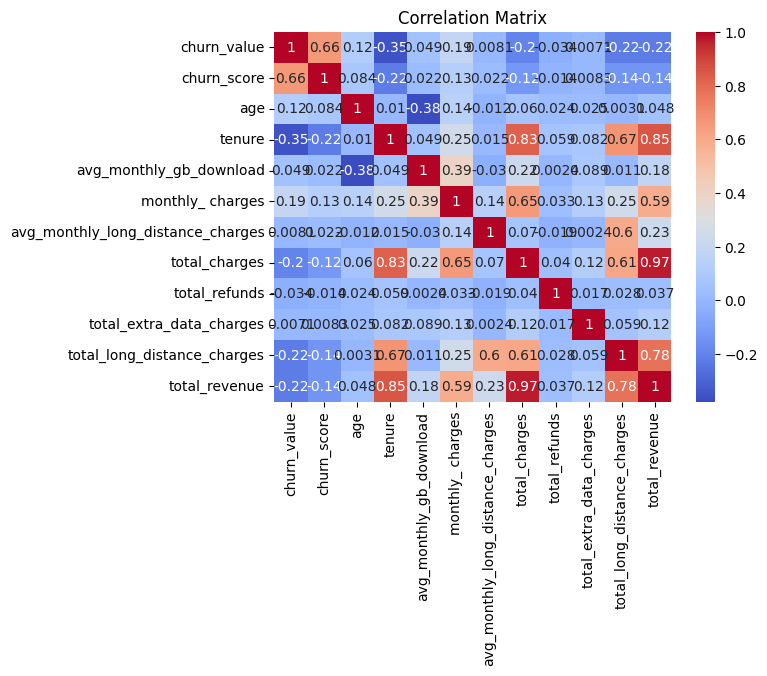

In [27]:
import seaborn as sns

import matplotlib.pyplot as plt


temp = df[['churn_value','churn_score','age','tenure','avg_monthly_gb_download','monthly_ charges','avg_monthly_long_distance_charges','total_charges','total_refunds','total_extra_data_charges','total_long_distance_charges','total_revenue']]
correlation_matrix = temp.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Cleaning & Preparation

### Drop Unneeded Columns

In [10]:

df = df.drop(['customer_id', 'customer_status', 'cltv','churn_score', 'churn_label','churn_category', 'churn_reason', 
'internet_service_y', 'phone_service_y', 'offer','country','state','city','zip_code','total_population', 'latitude',
'longitude', 'payment_method','paperless_billing', 'total_long_distance_charges','total_revenue','internet_service_x',
             'phone_service_x','streaming_tv','senior_citizen','dependents','number_of_referrals','referred_a_friend',
             'streaming_movies','streaming_music'], axis=1)


In [7]:
df.head()

,satisfaction_score,churn_value,online_security,online_backup,device_protection,premium_tech_support,internet_type,gender,age,under_30,partner,number_of_dependents,married,tenure,multiple_lines,avg_monthly_gb_download,unlimited_data,contract,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges
0,3,0,No,Yes,No,Yes,Cable,Female,37,No,Yes,0,Yes,9,No,16,Yes,One Year,65.6,42.39,593.30,0.00,0
1,5,0,No,No,No,No,Cable,Male,46,No,No,0,No,9,Yes,10,No,Month-to-Month,59.9,10.69,542.40,38.33,10
2,1,1,No,No,Yes,No,Fiber Optic,Male,50,No,No,0,No,4,No,30,Yes,Month-to-Month,73.9,33.65,280.85,0.00,0
3,1,1,No,Yes,Yes,No,Fiber Optic,Male,78,No,Yes,0,Yes,13,No,4,Yes,Month-to-Month,98.0,27.82,1237.85,0.00,0
4,1,1,No,No,No,Yes,Fiber Optic,Female,75,No,Yes,0,Yes,3,No,11,Yes,Month-to-Month,83.9,7.38,267.40,0.00,0


In [19]:
df.isna().sum()

satisfaction_score                      0
churn_value                             0
phone_service_x                         0
internet_service_x                      0
online_security                         0
online_backup                           0
device_protection                       0
premium_tech_support                    0
streaming_tv                            0
streaming_movies                        0
streaming_music                         0
internet_type                        1526
gender                                  0
age                                     0
under_30                                0
senior_citizen                          0
partner                                 0
dependents                              0
number_of_dependents                    0
married                                 0
tenure                                  0
multiple_lines                          0
avg_monthly_gb_download                 0
unlimited_data                    

In [11]:
from sklearn.impute import SimpleImputer

cols = ['internet_type']
imputer = SimpleImputer(strategy='most_frequent')

# Apply only to specific columns
df[cols] = imputer.fit_transform(df[cols])


In [23]:
df.isna().sum()

satisfaction_score                   0
churn_value                          0
phone_service_x                      0
internet_service_x                   0
online_security                      0
online_backup                        0
device_protection                    0
premium_tech_support                 0
streaming_tv                         0
streaming_movies                     0
streaming_music                      0
internet_type                        0
gender                               0
age                                  0
under_30                             0
senior_citizen                       0
partner                              0
dependents                           0
number_of_dependents                 0
married                              0
tenure                               0
multiple_lines                       0
avg_monthly_gb_download              0
unlimited_data                       0
referred_a_friend                    0
number_of_referrals      

In [12]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ['online_security','online_backup',
                  'device_protection','premium_tech_support','under_30','partner',
                 'married','multiple_lines','unlimited_data']

encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the selected columns
encoded = encoder.fit_transform(df[cols_to_encode])

# Create a DataFrame for the encoded data
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cols_to_encode))

# Concatenate the encoded data with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original encoded columns
df.drop(cols_to_encode, axis=1, inplace=True)


In [26]:
df.head()

,satisfaction_score,churn_value,internet_type,gender,age,number_of_dependents,tenure,avg_monthly_gb_download,contract,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,online_security_Yes,online_backup_Yes,device_protection_Yes,premium_tech_support_Yes,under_30_Yes,partner_Yes,married_Yes,multiple_lines_Yes,unlimited_data_Yes
0,3,0,Cable,Female,37,0,9,16,One Year,65.6,42.39,593.30,0.00,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,5,0,Cable,Male,46,0,9,10,Month-to-Month,59.9,10.69,542.40,38.33,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,Fiber Optic,Male,50,0,4,30,Month-to-Month,73.9,33.65,280.85,0.00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,Fiber Optic,Male,78,0,13,4,Month-to-Month,98.0,27.82,1237.85,0.00,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,1,1,Fiber Optic,Female,75,0,3,11,Month-to-Month,83.9,7.38,267.40,0.00,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [13]:
cols_to_encode = ['internet_type',	'gender','contract']
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the selected columns
encoded = encoder.fit_transform(df[cols_to_encode])

# Create a DataFrame for the encoded data
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cols_to_encode))

# Concatenate the encoded data with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original encoded columns
df.drop(cols_to_encode, axis=1, inplace=True)

In [28]:
df.head()

,satisfaction_score,churn_value,age,number_of_dependents,tenure,avg_monthly_gb_download,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,online_security_Yes,online_backup_Yes,device_protection_Yes,premium_tech_support_Yes,under_30_Yes,partner_Yes,married_Yes,multiple_lines_Yes,unlimited_data_Yes,internet_type_DSL,internet_type_Fiber Optic,gender_Male,contract_One Year,contract_Two Year
0,3,0,37,0,9,16,65.6,42.39,593.30,0.00,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5,0,46,0,9,10,59.9,10.69,542.40,38.33,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,50,0,4,30,73.9,33.65,280.85,0.00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,1,78,0,13,4,98.0,27.82,1237.85,0.00,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1,1,75,0,3,11,83.9,7.38,267.40,0.00,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [14]:
X = df.drop("churn_value", axis = 1)
y = df["churn_value"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.3)

NameError: name 'X' is not defined

# Model Creation

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

model = pipeline.fit(X_train, y_train)


In [23]:
predictions = model.predict(X_test)

## Model Performance


In [24]:
# Print model accuracy
accuracy = model.score(X_test, y_test)
print("accuracy = ", round((accuracy * 100), 5), "%")

accuracy =  81.25887 %


In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1552
           1       0.67      0.58      0.62       561

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



## Feature Importance

In [27]:
logreg_model = pipeline.named_steps['logreg']

# Compute feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': logreg_model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


                              Feature  Importance
3                    monthly_ charges    0.761023
5                       total_charges    0.736421
0                                 age    0.343498
11                       under_30_Yes    0.145613
13                 unlimited_data_Yes    0.133945
7            total_extra_data_charges    0.075461
16                        gender_Male    0.006624
12                 multiple_lines_Yes    0.005312
6                       total_refunds   -0.033392
9               device_protection_Yes   -0.075891
2             avg_monthly_gb_download   -0.078458
14                  internet_type_DSL   -0.085750
15          internet_type_Fiber Optic   -0.105088
4   avg_monthly_long_distance_charges   -0.139980
8                   online_backup_Yes   -0.158930
10           premium_tech_support_Yes   -0.247462
17                  contract_One Year   -0.604605
18                  contract_Two Year   -1.098700
1                              tenure   -1.323725


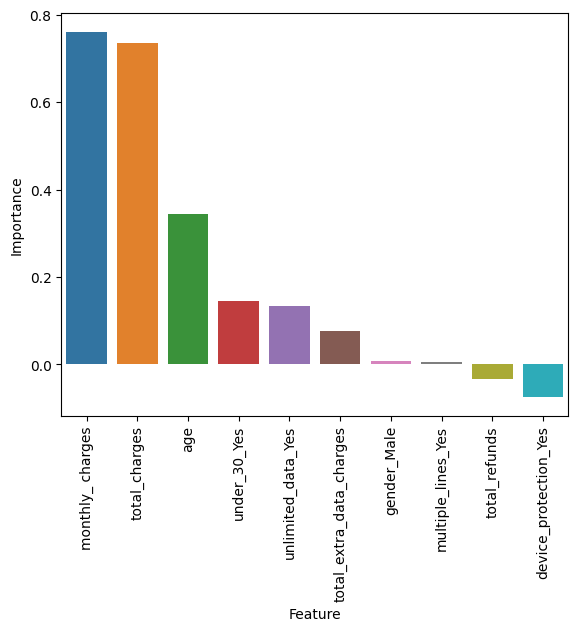

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_importance_temp = feature_importance.sort_values(by='Importance', ascending=False).head(10)

sns.barplot(data=feature_importance_temp, x='Feature', y='Importance')
plt.tight_layout()
plt.xticks(rotation=90)


plt.show()


In [31]:
# drop cols that are not needed 

cols_drop = ['avg_monthly_long_distance_charges','online_backup_Yes','premium_tech_support_Yes','contract_One Year','contract_Two Year', 'tenure' ]
df.drop(cols_drop, axis=1, inplace=True)

X = df.drop("churn_value", axis = 1)
y = df["churn_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.3)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

model = pipeline.fit(X_train, y_train)

predictions = model.predict(X_test)

In [32]:
# Print model accuracy
accuracy = model.score(X_test, y_test)
print("accuracy = ", round((accuracy * 100), 5), "%")

accuracy =  79.3185 %


In [34]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'logreg__penalty': ['l2'],        # Use L2 regularization
    'logreg__solver': ['liblinear'],  # Solver compatible with small datasets
    'logreg__max_iter': [100, 200],   # Number of iterations
}

# Set up StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=6, shuffle=True)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',  # Scoring metric
    cv=cv,               # Use StratifiedKFold
    verbose=2,           # Verbose output
    n_jobs=-1            # Parallelize across all processors
)

# Fit the GridSearchCV object
grid_search.fit(X, y)

# Best hyperparameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Evaluate on the same dataset for demonstration (replace with a proper test set)
y_pred = best_model.predict(X)
print("Accuracy on Full Dataset:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))


Fitting 6 folds for each of 8 candidates, totalling 48 fits
Best Parameters: {'logreg__C': 10, 'logreg__max_iter': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best Cross-Validation Score: 0.7878736167207174
Accuracy on Full Dataset: 0.7898622745988925
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      5174
           1       0.65      0.46      0.54      1869

    accuracy                           0.79      7043
   macro avg       0.73      0.68      0.70      7043
weighted avg       0.78      0.79      0.78      7043



In [35]:
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.79301533 0.77597956 0.80579216 0.78109029 0.78875639 0.78431373]
Mean CV Accuracy: 0.7881579093874915


In [36]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
print(results[['mean_test_score', 'param_logreg__C', 'param_logreg__solver']])


   mean_test_score param_logreg__C param_logreg__solver
0         0.787164            0.01            liblinear
1         0.787164            0.01            liblinear
2         0.787731             0.1            liblinear
3         0.787731             0.1            liblinear
4         0.787732               1            liblinear
5         0.787732               1            liblinear
6         0.787874              10            liblinear
7         0.787874              10            liblinear


In [37]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,  # Limit the number of combinations to test
    cv=cv,
    scoring='accuracy',
    verbose=2,
    random_state=42
)
random_search.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 6 folds for each of 8 candidates, totalling 48 fits
[CV] END logreg__C=0.01, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.01, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.01, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.01, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.01, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.01, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.01, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.01, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.01, logreg__max_iter=20

RandomizedSearchCV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logreg', LogisticRegression())]),
                   param_distributions={'logreg__C': [0.01, 0.1, 1, 10],
                                        'logreg__max_iter': [100, 200],
                                        'logreg__penalty': ['l2'],
                                        'logreg__solver': ['liblinear']},
                   random_state=42, scoring='accuracy', verbose=2)

In [38]:
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'logreg__solver': 'liblinear', 'logreg__penalty': 'l2', 'logreg__max_iter': 100, 'logreg__C': 10}


In [39]:
# Best model based on hyperparameter search
best_model = random_search.best_estimator_

# Evaluate the best model on the full dataset or test data (replace X_test, y_test if available)

y_pred = best_model.predict(X)
print("Accuracy on Full Dataset:", accuracy_score(y, y_pred))


Accuracy on Full Dataset: 0.7898622745988925


In [40]:
from sklearn.metrics import classification_report

# Print detailed classification metrics

print("Classification Report:\n", classification_report(y, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      5174
           1       0.65      0.46      0.54      1869

    accuracy                           0.79      7043
   macro avg       0.73      0.68      0.70      7043
weighted avg       0.78      0.79      0.78      7043



In [15]:
#xgboost classifier

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Creating an XGBoost classifier
model = xgb.XGBClassifier()

#Training the model on the training data
model.fit(X_train, y_train)

#Making predictions on the test set
predictions = model.predict(X_test)


#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)


Accuracy: 0.9474804826117814
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1046
           1       0.91      0.88      0.90       363

    accuracy                           0.95      1409
   macro avg       0.93      0.93      0.93      1409
weighted avg       0.95      0.95      0.95      1409



In [19]:
train_predictions = model.predict(X_train)

# Calculating training accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)
train_report = classification_report(y_train, train_predictions)
print("Training Classification Report:\n", train_report)


Training Accuracy: 0.9998225062122825
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4128
           1       1.00      1.00      1.00      1506

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [18]:
# Making predictions on the test set
test_predictions = model.predict(X_test)

# Calculating test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)
test_report = classification_report(y_test, test_predictions)
print("Test Classification Report:\n", test_report)


Test Accuracy: 0.9474804826117814
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1046
           1       0.91      0.88      0.90       363

    accuracy                           0.95      1409
   macro avg       0.93      0.93      0.93      1409
weighted avg       0.95      0.95      0.95      1409



Feature Importances: [0.77256376 0.0049477  0.02238369 0.01291724 0.00448586 0.0082258
 0.00480761 0.00544565 0.00486272 0.00483692 0.07442609 0.00388761
 0.0040954  0.00672448 0.         0.00273087 0.         0.00566812
 0.00405583 0.0073027  0.00344965 0.00434349 0.00917176 0.02866705]


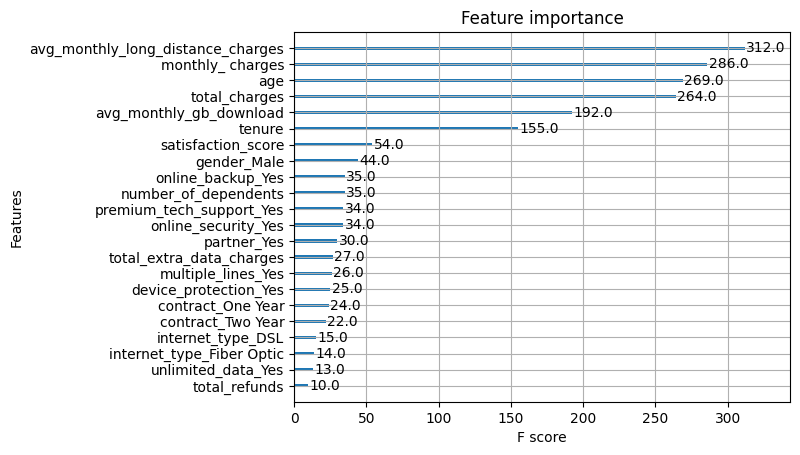

In [17]:
import matplotlib.pyplot as plt
importance = model.feature_importances_
print("Feature Importances:", importance)

# Plot feature importances
xgb.plot_importance(model)
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the final model with the best parameters
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best Score: 0.9577564785232516
